In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [3]:
mass_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

In [4]:

def SHMR_plot(theta, mass_mat, red_mat, model_color):    # Create scatter plot
    plt.figure(figsize=(10, 8))

    mock_ind = np.random.randint(0, 100)
    halo_masses = np.linspace(8, 14, 100)
    stellar_mat = jsm_SHMR.general(theta, mass_mat, red_mat)
    theta_det = theta[:2] + [0, 0] + theta[4:]
    det = jsm_SHMR.general(theta_det, halo_masses, 0)
    sigma = theta[2] + theta[3] * (halo_masses - 12)
    stat_mock = jsm_stats.SatStats(stellar_mat[mock_ind], min_mass=6.5)

    # Distribution plot on the right

    star_bins = np.linspace(6.5,11.5,30)

    ax_right = plt.subplot2grid((3, 3), (0, 0), rowspan=2)
    ax_right.hist(stellar_mat[mock_ind].flatten(), bins=star_bins, orientation='horizontal', alpha=0.6, edgecolor="white", color=model_color)
    ax_right.invert_xaxis()
    ax_right.yaxis.tick_left()
    ax_right.set_ylim(6.5, 10)
    ax_right.set_xlim(600, 0)


    # Scatter plot
    ax_main = plt.subplot2grid((3, 3), (0, 1), rowspan=2, colspan=2)
    ax_main.set_title(f"$\\theta$ = {theta}", fontsize=15)
    ax_main.plot(halo_masses, det, color=model_color, label="deterministic", lw=2, zorder=1)
    ax_main.fill_between(halo_masses, det - sigma, det + sigma, color=model_color, alpha=0.6)
    ax_main.fill_between(halo_masses, det - 2 * sigma, det + 2 * sigma, color=model_color, alpha=0.3)

    ax_main.set_ylim(6.5, 10)
    ax_main.set_xlim(9.0, 12)
    ax_main.scatter(mass_mat[mock_ind], stellar_mat[mock_ind], marker=".", color="black", label=f"mock index: {mock_ind}")
    ax_main.legend()
    ax_main.set_ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
    ax_main.set_xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)

    # Create four smaller panels on the bottom row
    ax_bottom1 = plt.subplot2grid((3, 3), (2, 0))
    ax_bottom2 = plt.subplot2grid((3, 3), (2, 1))
    ax_bottom3 = plt.subplot2grid((3, 3), (2, 2))

    ax_bottom1.plot(np.arange(stat_mock.Pnsat.shape[0]), stat_mock.Pnsat, color="black", zorder=5)
    ax_bottom1.set_xlim(0, 35)
    ax_bottom1.set_xlabel("Nsat")

    ax_bottom2.plot(stat_mock.Msmax_sorted, stat_mock.ecdf_Msmax, color="black", zorder=5, label="max")
    ax_bottom2.plot(stat_mock.Mstot_sorted, stat_mock.ecdf_Mstot, color="black", ls="--", zorder=5, label="total")
    ax_bottom2.plot(stat_mock.Msave_sorted, stat_mock.ecdf_Msave, color="black", ls=":", zorder=5, label="mean")
    ax_bottom2.legend(loc=4)

    #ax_bottom2.set_xlim(5, 11)
    ax_bottom2.set_xlabel("log Ms")

    ax_bottom3.axvline(stat_mock.r, color="black")
    ax_bottom3.set_xlabel("r (Nsat | max(Ms))")

    coef = []
    for i in stellar_mat:
        stat = jsm_stats.SatStats(i, min_mass=6.5)
        coef.append(stat.r)
        ax_bottom1.plot(np.arange(stat.Pnsat.shape[0]), stat.Pnsat, color=model_color, alpha=0.1)
        ax_bottom2.plot(stat.Msmax_sorted, stat.ecdf_Msmax, color=model_color, alpha=0.1)

    binz = np.linspace(-0.5,1,25)
    ax_bottom3.hist(coef, bins=binz,alpha=0.7, edgecolor="white", color=model_color)
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


In [5]:
# def SHMR_plot(theta, mass_mat, red_mat,model_color):
#     # Create a figure with a grid layout
#     fig = plt.figure(figsize=(15, 10))
#     gs = gridspec.GridSpec(2, 5, height_ratios=[2, 1])

#     mock_ind = np.random.randint(0, 100)
#     halo_masses = np.linspace(8, 12, 100)
#     stellar_mat = jsm_SHMR.general(theta, mass_mat, red_mat)
#     theta_det = theta[:2] + [0, 0] + theta[4:]
#     det = jsm_SHMR.general(theta_det, halo_masses, 0)
#     sigma = theta[2] + theta[3] * (halo_masses - 12)
#     stat_mock = jsm_stats.SatStats(stellar_mat[mock_ind], min_mass=6.5)

#     # Create your long plot on top
#     ax_top = plt.subplot(gs[0, :4])
#     ax_top.set_title(f"$\\theta$ = {theta}", fontsize=15)
#     ax_top.plot(halo_masses, det, color=model_color, label="deterministic", lw=2, zorder=1)
#     ax_top.fill_between(halo_masses, det - sigma, det + sigma, color=model_color, alpha=0.6)
#     ax_top.fill_between(halo_masses, det - 2 * sigma, det + 2 * sigma, color=model_color, alpha=0.3)

#     ax_top.set_ylim(6.5, 10)
#     ax_top.set_xlim(9.0, 12)
#     ax_top.scatter(mass_mat[mock_ind], stellar_mat[mock_ind], marker=".", color="black", label=f"mock index: {mock_ind}")
#     ax_top.legend()

#     # Create three smaller plots on the bottom
#     ax_bottom1 = plt.subplot(gs[1, 0])
#     ax_bottom1.plot(np.arange(stat_mock.Pnsat.shape[0]), stat_mock.Pnsat, color="black", zorder=5)
#     ax_bottom1.set_xlim(0, 35)
#     ax_bottom1.set_xlabel("Nsat")

#     ax_bottom2 = plt.subplot(gs[1, 1])
#     ax_bottom2.plot(stat_mock.Msmax_sorted, stat_mock.ecdf_Msmax, color="black", zorder=5)
#     ax_bottom2.set_xlim(4, 11)
#     ax_bottom2.set_xlabel("log max(Ms)")

#     ax_bottom3 = plt.subplot(gs[1, 2])
#     ax_bottom3.plot(stat_mock.Mstot_sorted, stat_mock.ecdf_Mstot, color="black", zorder=5)
#     ax_bottom3.set_xlim(4, 11)
#     ax_bottom3.set_xlabel("log total(Ms)")

#     ax_bottom4 = plt.subplot(gs[1, 3])
#     ax_bottom4.axvline(jsm_stats.correlation_coef(stat_mock.satfreq, stat_mock.Msmax), color="black")
#     ax_bottom4.set_xlabel("r (Nsat | max(Ms))")

#     coef = []
#     for i in stellar_mat:
#         stat = jsm_stats.SatStats(i, min_mass=6.5)
#         coef.append(jsm_stats.correlation_coef(stat.satfreq, stat.Msmax))
#         ax_bottom1.plot(np.arange(stat.Pnsat.shape[0]), stat.Pnsat, color=model_color, alpha=0.1)
#         ax_bottom2.plot(stat.Msmax_sorted, stat.ecdf_Msmax, color=model_color, alpha=0.1)
#         ax_bottom3.plot(stat.Mstot_sorted, stat.ecdf_Mstot, color=model_color, alpha=0.1)


#     binz = np.linspace(-0.5,1,25)
#     ax_bottom4.hist(coef, bins=binz,alpha=0.7, edgecolor="white", color=model_color)
#     plt.show()

### the statistics we use

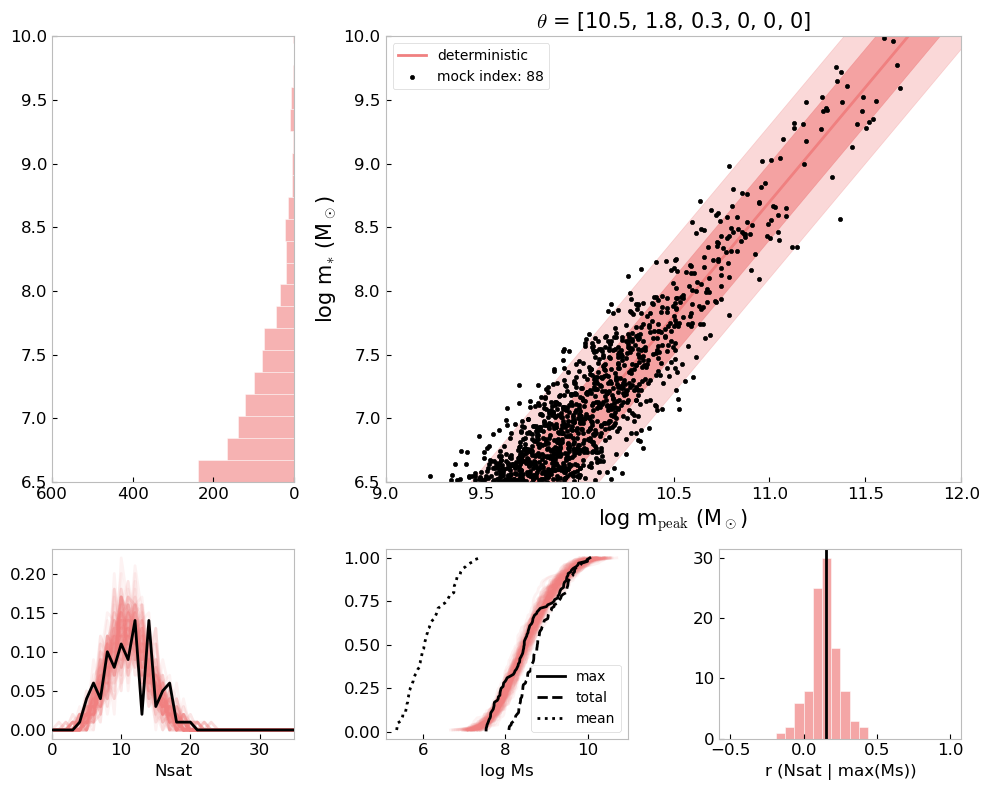

In [6]:
theta1 = [10.5, 1.8, 0.3, 0, 0, 0]

SHMR_plot(theta1, mass_example, red_example, model_color="lightcoral")

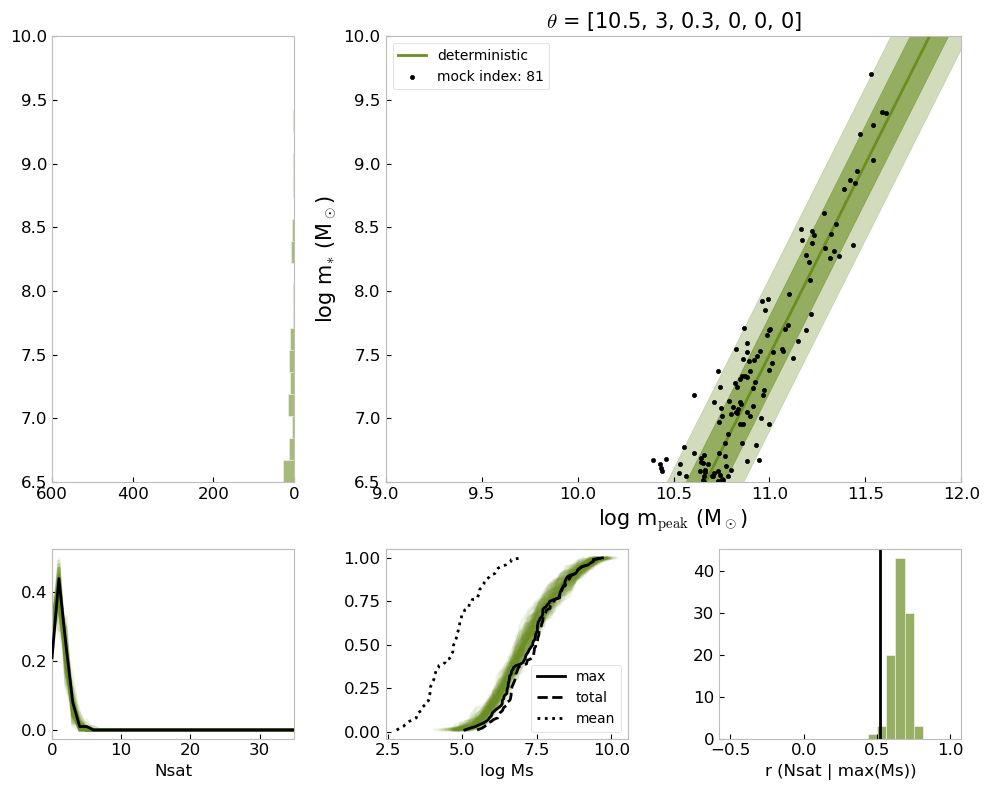

In [7]:
theta2 = [10.5, 3, 0.3, 0, 0, 0]

SHMR_plot(theta2, mass_example, red_example, model_color="olivedrab")

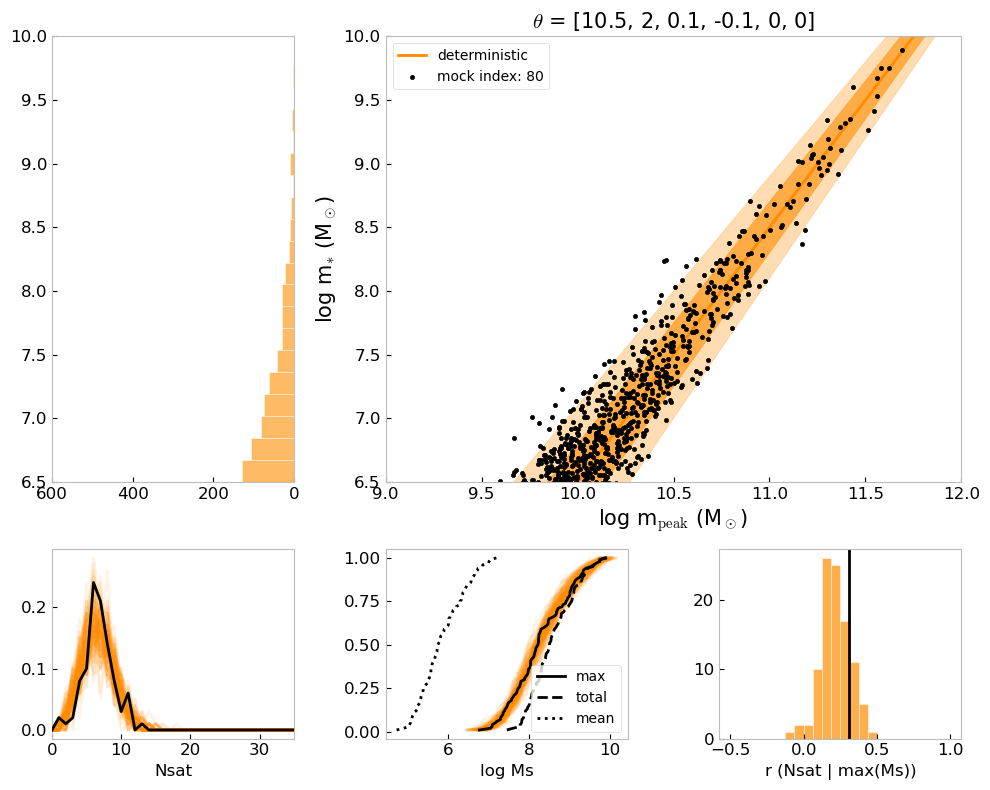

In [8]:
theta3 = [10.5, 2, 0.1, -0.1, 0, 0]

SHMR_plot(theta3, mass_example, red_example, model_color="darkorange")

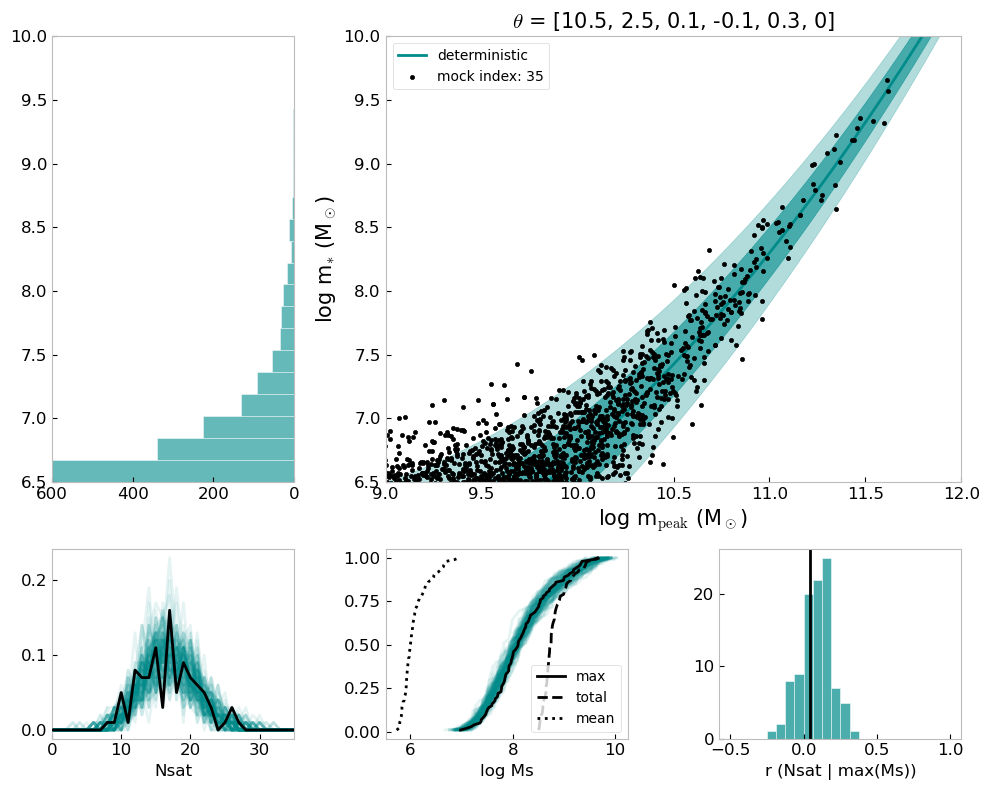

In [9]:
theta4 = [10.5, 2.5, 0.1, -0.1, 0.3, 0]

SHMR_plot(theta4, mass_example, red_example, model_color="darkcyan")

### Level of correlation depends on theta! and maybe not so much on the specific mock survey

In [10]:
coef1 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta1, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    coef1.append(stat.r)

coef2 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta2, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    coef2.append(stat.r)

coef3 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta3, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    coef3.append(stat.r)

coef4 = []
for i in range(99):
    lgMs = jsm_SHMR.general(theta4, mass_example[i], red_example[i])
    stat = jsm_stats.SatStats(lgMs, min_mass=6.5)
    coef4.append(stat.r)


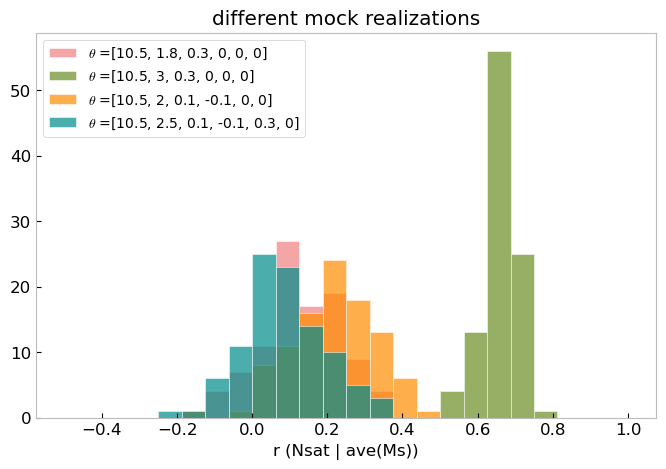

In [11]:
binz = np.linspace(-0.5,1,25)

plt.figure(figsize=(8,5))
plt.title("different mock realizations")
plt.hist(coef1, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta1}", color="lightcoral")
plt.hist(coef2, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta2}", color="olivedrab")
plt.hist(coef3, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta3}", color="darkorange")
plt.hist(coef4, bins=binz,alpha=0.7, edgecolor="white", label=f"$\\theta$ ={theta4}", color="darkcyan")
plt.xlabel("r (Nsat | ave(Ms))")
plt.legend(loc=2, framealpha=1)
plt.show()

In [12]:
alpha1 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_1/chain.h5", Nstack=1, Nburn=500, Nthin=25)

theta_fid = [10.5, 2.0, 0.2, 0, 0, 0]

data = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/alpha/mock_1/mock_data.npy")

In [13]:
stat_fid = jsm_stats.SatStats(data.lgMs, min_mass=6.5)

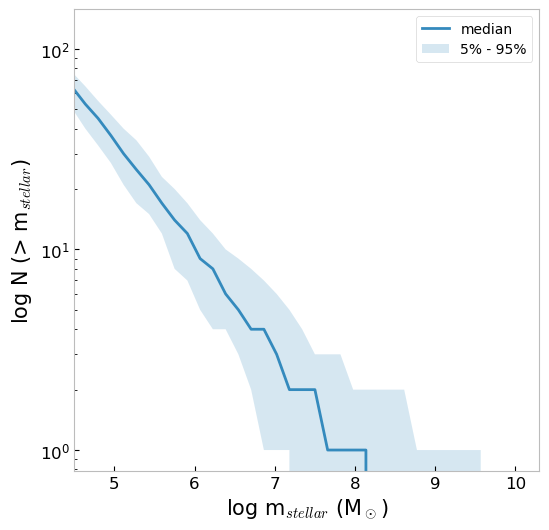

In [14]:
stat_fid.CSMF(plotmed=True)

#### the CHI2 test

In [15]:
alpha1 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_2/chain.h5", Nstack=1, Nburn=500, Nthin=25)

theta_fid = [10.5, 1.5, 0.2, 0, 0, 0]

data = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/alpha/mock_2/mock_data.npy")

In [16]:
mass_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

mass_example = np.vstack(mass_example)
red_example = np.vstack(red_example)

In [17]:
stat_fid = jsm_stats.SatStats(data.lgMs, min_mass=6.5)

stat_fid.r

-0.17859592581482256

In [18]:
lgMs_models = jsm_SHMR.general(alpha1.end[12], mass_example)

In [19]:
lgMs_models_split = np.array(np.split(lgMs_models, 100, axis=0))

In [20]:
test = []
for i in lgMs_models_split:
    i_stat = jsm_stats.SatStats(i, min_mass=6.5)
    test.append(i_stat.r)

In [21]:
chi2 = jsm_stats.lnL_chi2r(test, stat_fid.r)

Text(0.5, 0, 'correlation')

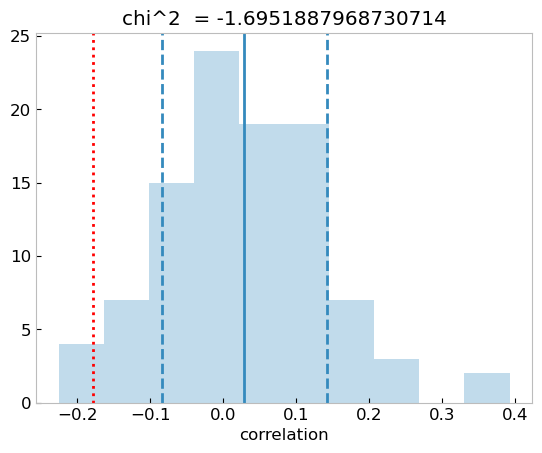

In [22]:
plt.title(f"chi^2  = {chi2}")
plt.hist(test, alpha=0.3)
plt.axvline(np.average(test))
plt.axvline(np.average(test) + np.std(test), ls="--")
plt.axvline(np.average(test) - np.std(test), ls="--")
plt.axvline(stat_fid.r, color="red", ls=":")
plt.xlabel("correlation")

Text(0.5, 0, 'correlation')

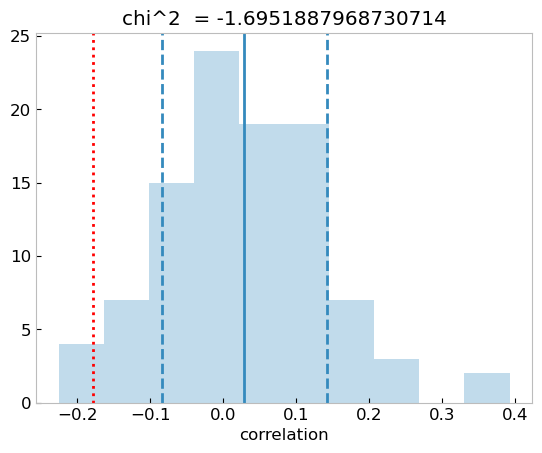

In [23]:
plt.title(f"chi^2  = {chi2}")
plt.hist(test, alpha=0.3)
plt.axvline(np.average(test))
plt.axvline(np.average(test) + np.std(test), ls="--")
plt.axvline(np.average(test) - np.std(test), ls="--")
plt.axvline(stat_fid.r, color="red", ls=":")
plt.xlabel("correlation")

Text(0.5, 0, 'correlation')

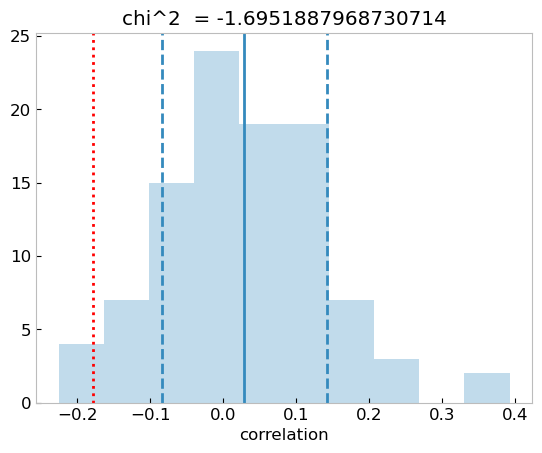

In [24]:
plt.title(f"chi^2  = {chi2}")
plt.hist(test, alpha=0.3)
plt.axvline(np.average(test))
plt.axvline(np.average(test) + np.std(test), ls="--")
plt.axvline(np.average(test) - np.std(test), ls="--")
plt.axvline(stat_fid.r, color="red", ls=":")
plt.xlabel("correlation")

### trying the total CSMF!

In [67]:
mock_1 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/alpha/mock_1/mock_data.npy")

mock_2 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/alpha/mock_2/mock_data.npy")

mock_3 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/alpha/mock_3/mock_data.npy")

mock_4 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/alpha/mock_4/mock_data.npy")

mock_5 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/alpha/mock_5/mock_data.npy")

In [68]:
stat_1 = jsm_stats.SatStats(mock_1.lgMs, min_mass=6.5)

stat_2 = jsm_stats.SatStats(mock_2.lgMs, min_mass=6.5)

stat_3 = jsm_stats.SatStats(mock_3.lgMs, min_mass=6.5)

stat_4 = jsm_stats.SatStats(mock_4.lgMs, min_mass=6.5)

stat_5 = jsm_stats.SatStats(mock_5.lgMs, min_mass=6.5)

In [69]:
alphas = [1.5, 1.75, 2.0, 2.25, 2.5]

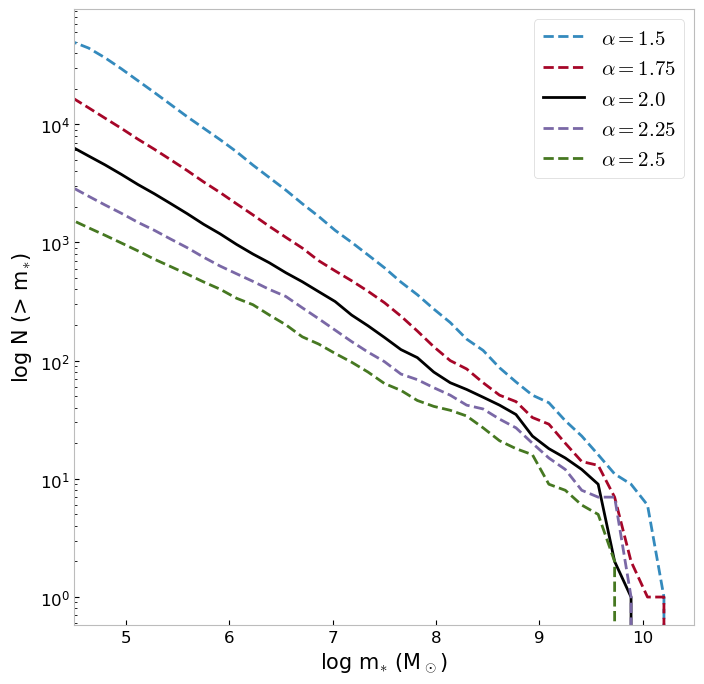

In [70]:
plt.figure(figsize=(8,8))
plt.plot(stat_1.mass_bins, stat_2.total, label="$\\alpha = 1.5$", ls="--")
plt.plot(stat_1.mass_bins, stat_3.total, label="$\\alpha = 1.75$", ls="--")

plt.plot(stat_1.mass_bins, stat_1.total, label="$\\alpha = 2.0$", color="black")

plt.plot(stat_1.mass_bins, stat_4.total, label="$\\alpha = 2.25$", ls="--")
plt.plot(stat_1.mass_bins, stat_5.total, label="$\\alpha = 2.5$", ls="--")


plt.xlim(4.5, 10.5)
plt.xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{*}$)", fontsize=15)
plt.yscale("log")
plt.legend(fontsize=15)
plt.show()

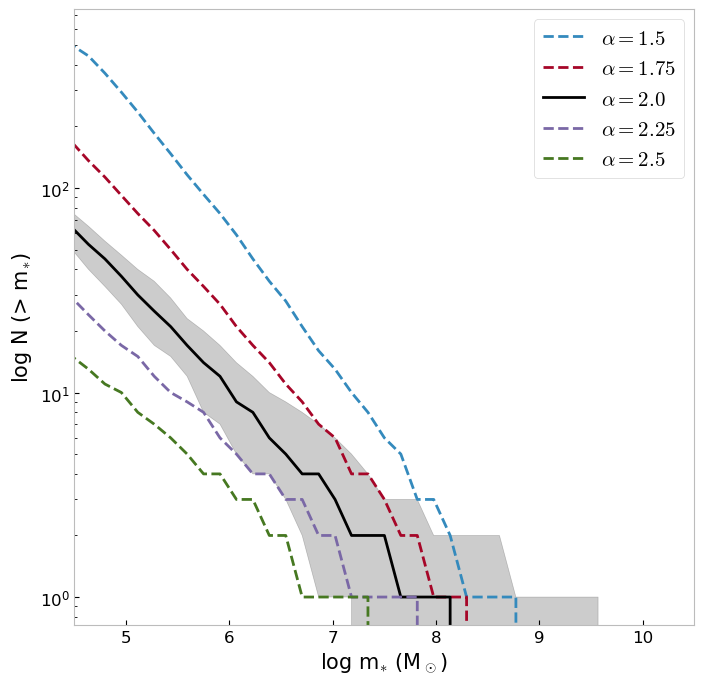

In [71]:
plt.figure(figsize=(8,8))
plt.plot(stat_1.mass_bins, stat_2.quant[1], label="$\\alpha = 1.5$", ls="--")
plt.plot(stat_1.mass_bins, stat_3.quant[1], label="$\\alpha = 1.75$", ls="--")

plt.plot(stat_1.mass_bins, stat_1.quant[1], label="$\\alpha = 2.0$", color="black")
plt.fill_between(stat_1.mass_bins, y1=stat_1.quant[0], y2=stat_1.quant[2], alpha=0.2, color="black")

plt.plot(stat_1.mass_bins, stat_4.quant[1], label="$\\alpha = 2.25$", ls="--")
plt.plot(stat_1.mass_bins, stat_5.quant[1], label="$\\alpha = 2.5$", ls="--")


plt.xlim(4.5, 10.5)
plt.xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{*}$)", fontsize=15)
plt.yscale("log")
plt.legend(fontsize=15)
plt.show()

In [72]:
mock_1 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/alpha/mock_1/mock_data.npy")

mock_2 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/sigma/mock_1/mock_data.npy")

mock_3 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/sigma/mock_2/mock_data.npy")

mock_4 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/sigma/mock_3/mock_data.npy")

mock_5 = jsm_models.init_data(theta_fid, "../../../data/paper/mock_permutations_a2/model_A/sigma/mock_4/mock_data.npy")

In [73]:
stat_1 = jsm_stats.SatStats(mock_1.lgMs, min_mass=6.5)

stat_2 = jsm_stats.SatStats(mock_2.lgMs, min_mass=6.5)

stat_3 = jsm_stats.SatStats(mock_3.lgMs, min_mass=6.5)

stat_4 = jsm_stats.SatStats(mock_4.lgMs, min_mass=6.5)

stat_5 = jsm_stats.SatStats(mock_5.lgMs, min_mass=6.5)

In [74]:
sigmas = [0.1, 0.2, 0.3, 0.4, 0.5]

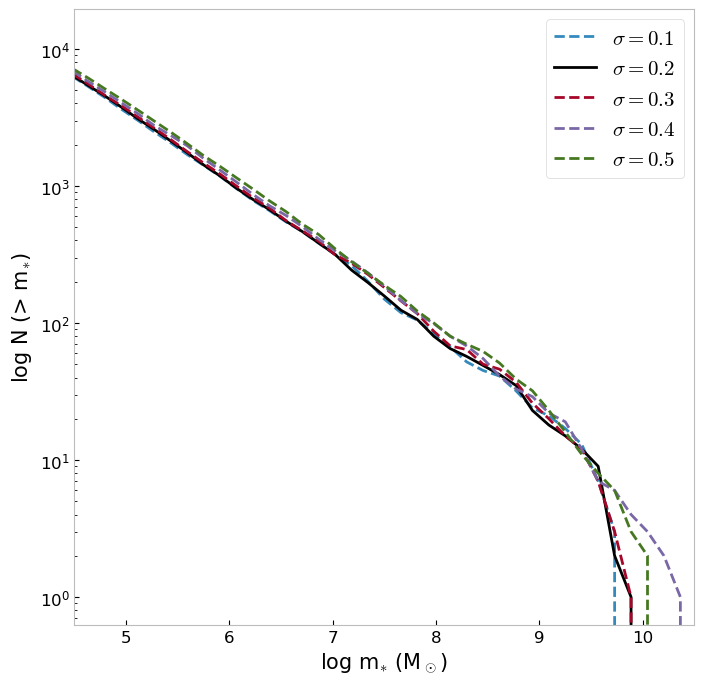

In [75]:
plt.figure(figsize=(8,8))
plt.plot(stat_1.mass_bins, stat_2.total, label="$\\sigma = 0.1$", ls="--")

plt.plot(stat_1.mass_bins, stat_1.total, label="$\\sigma = 0.2$", color="black")

plt.plot(stat_1.mass_bins, stat_3.total, label="$\\sigma = 0.3$", ls="--")
plt.plot(stat_1.mass_bins, stat_4.total, label="$\\sigma = 0.4$", ls="--")
plt.plot(stat_1.mass_bins, stat_5.total, label="$\\sigma = 0.5$", ls="--")


plt.xlim(4.5, 10.5)
plt.xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{*}$)", fontsize=15)
plt.yscale("log")
plt.legend(fontsize=15)
plt.show()

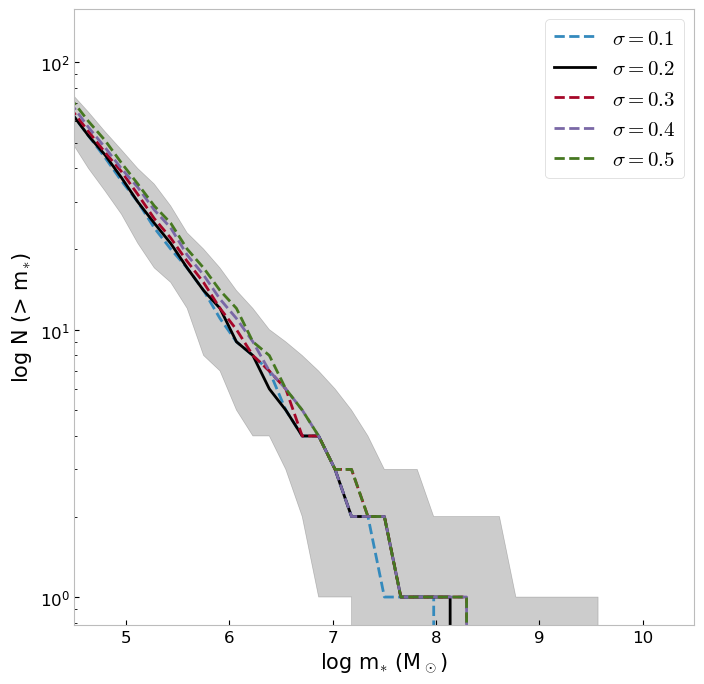

In [76]:
plt.figure(figsize=(8,8))
plt.plot(stat_1.mass_bins, stat_2.quant[1], label="$\\sigma = 0.1$", ls="--")

plt.plot(stat_1.mass_bins, stat_1.quant[1], label="$\\sigma = 0.2$", color="black")
plt.fill_between(stat_1.mass_bins, y1=stat_1.quant[0], y2=stat_1.quant[2], alpha=0.2, color="black")

plt.plot(stat_1.mass_bins, stat_3.quant[1], label="$\\sigma = 0.3$", ls="--")
plt.plot(stat_1.mass_bins, stat_4.quant[1], label="$\\sigma = 0.4$", ls="--")
plt.plot(stat_1.mass_bins, stat_5.quant[1], label="$\\sigma = 0.5$", ls="--")


plt.xlim(4.5, 10.5)
plt.xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{*}$)", fontsize=15)
plt.yscale("log")
plt.legend(fontsize=15)
plt.show()

In [77]:
import corner

In [79]:
alpha1 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_1/chain.h5", Nstack=500, Nburn=500, Nthin=25)

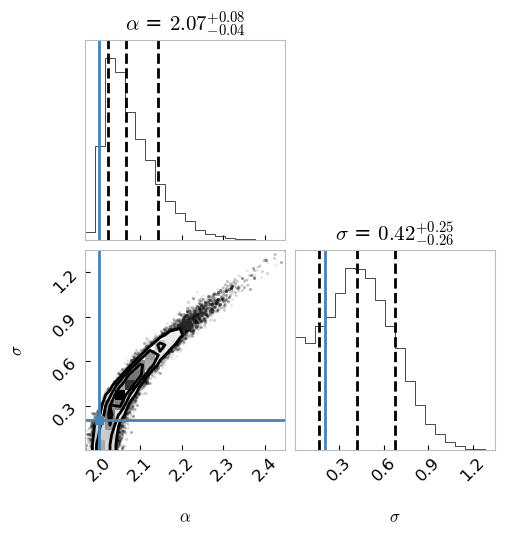

In [93]:
figure = corner.corner(
    alpha1.end[:,1:3],
    labels=[
        r"$\alpha$",
        r"$\sigma$",
    ],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    truths = [2.0, 0.2],
    title_kwargs={"fontsize": 15})

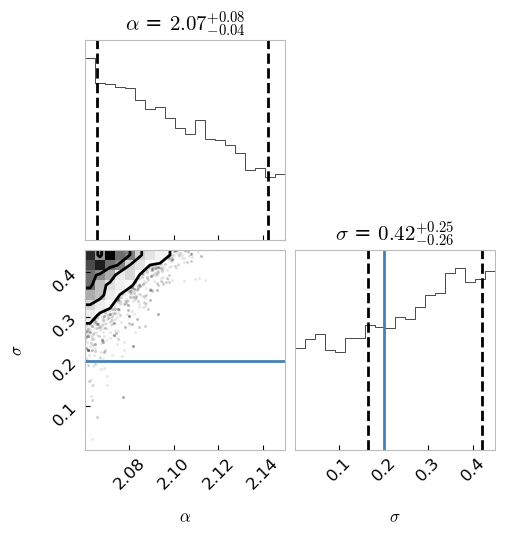

In [95]:
figure = corner.corner(
    alpha1.end[:,1:3],
    labels=[
        r"$\alpha$",
        r"$\sigma$",
    ],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    truths = [2.0, 0.2],
    range = [[2.06, 2.15], [0, 0.45]],
    title_kwargs={"fontsize": 15})

### adding in LnL analysis

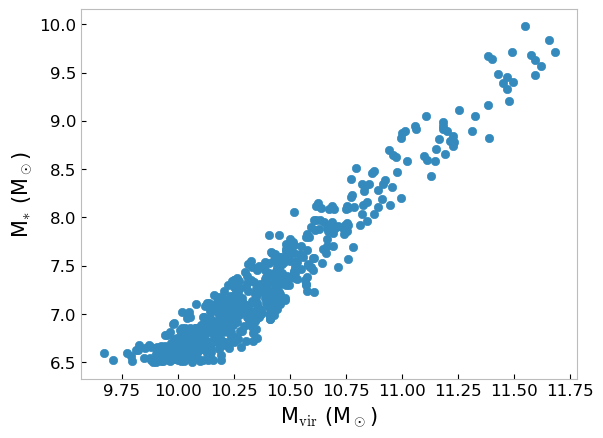

In [158]:
fid_theta = np.array([10.5, 2.0, 0.2, 0, 0, 0])
thetas = np.tile(fid_theta, (1000, 1))
Ntree = 100
min_mass = 6.5

data = jsm_models.init_data(fid_theta, "../../../SatGen/mcmc/correlation_test/alpha/mock_1/mock_data.npy")
data.get_stats(min_mass=min_mass)
data.get_data_points(plot=True)

In [159]:
models = jsm_models.load_models("../../../data/MW-analog/meta_data_psi3/")

def forward(theta):
    models.push_theta(theta, jsm_SHMR.general, min_mass, Ntree)
    return models.stat.Pnsat, models.stat.Msmax_sorted, models.stat.ecdf_Msmax, models.correlations

def lnlike(theta):    
    model_Pnsat, models_Msmax_sorted, _, models_correlations = forward(theta)
    lnL_sat = jsm_stats.lnL_Pnsat(model_Pnsat, data.stat.satfreq)
    lnL_max = jsm_stats.lnL_KS(models_Msmax_sorted, data.stat.Msmax_sorted)
    lnL_r = jsm_stats.lnL_chi2r(models_correlations, data.stat.r)
    return np.array([lnL_sat, lnL_max, lnL_r])

In [160]:
wow = np.apply_along_axis(lnlike, 1, thetas)

In [187]:
stat_Pnsat = np.percentile(wow[:,0]*(-2/584), np.array([5, 50, 95]), method="closest_observation")

stat_KS = np.percentile(wow[:,1]*(-2), np.array([5, 50, 95]), method="closest_observation")

stat_r = np.percentile(wow[:,2]*(-2), np.array([5, 50, 95]), method="closest_observation")

stat_total = np.percentile(np.sum(wow, axis=1)*(-2), np.array([5, 50, 95]), method="closest_observation")

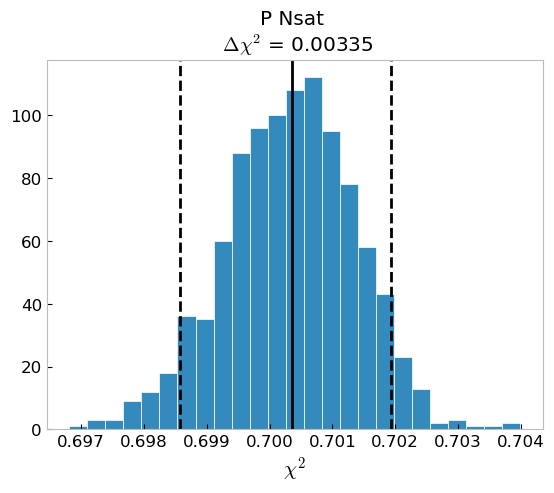

In [188]:
plt.title(f"P Nsat \n $\Delta \chi^2$ = {stat_Pnsat[2]-stat_Pnsat[0]:.3g}")
plt.hist(wow[:,0]*(-2/584), bins=25, edgecolor="white")
plt.axvline(stat_Pnsat[0], ls="--", color="black")
plt.axvline(stat_Pnsat[1], color="black")
plt.axvline(stat_Pnsat[2], ls="--", color="black")
plt.xlabel("$\chi^2$", fontsize=15)
plt.show()

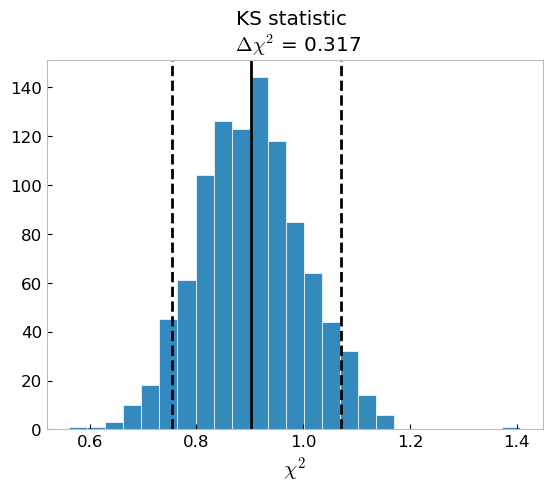

In [189]:
plt.title(f"KS statistic \n $\Delta \chi^2$ = {stat_KS[2]-stat_KS[0]:.3g}")
plt.hist(wow[:,1]*(-2), bins=25, edgecolor="white")
plt.axvline(stat_KS[0], ls="--", color="black")
plt.axvline(stat_KS[1], color="black")
plt.axvline(stat_KS[2], ls="--", color="black")
plt.xlabel("$\chi^2$", fontsize=15)
plt.show()

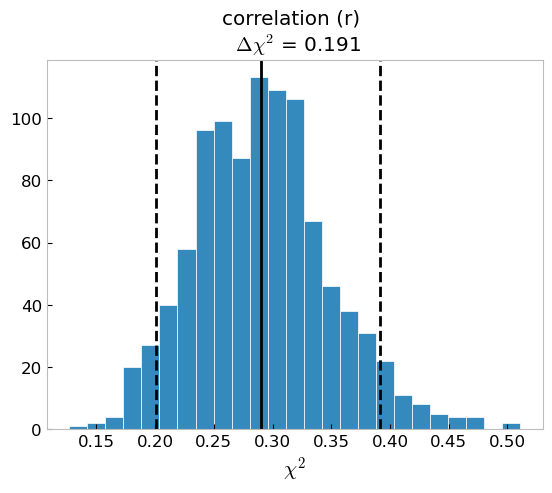

In [190]:
plt.title(f"correlation (r) \n $\Delta \chi^2$ = {stat_r[2]-stat_r[0]:.3g}")
plt.hist(wow[:,2]*(-2), bins=25, edgecolor="white")
plt.axvline(stat_r[0], ls="--", color="black")
plt.axvline(stat_r[1], color="black")
plt.axvline(stat_r[2], ls="--", color="black")
plt.xlabel("$\chi^2$", fontsize=15)
plt.show()

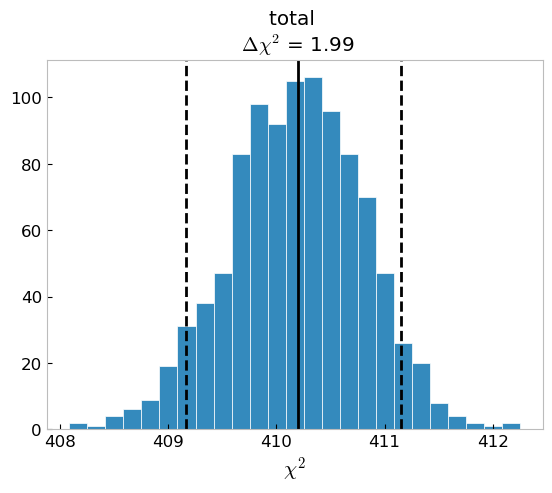

In [183]:
plt.title(f"total \n $\Delta \chi^2$ = {stat_total[2]-stat_total[0]:.3g}")
plt.hist(np.sum(wow, axis=1)*(-2), bins=25, edgecolor="white")
plt.axvline(stat_total[0], ls="--", color="black")
plt.axvline(stat_total[1], color="black")
plt.axvline(stat_total[2], ls="--", color="black")
plt.xlabel("$\chi^2$", fontsize=15)
plt.show()